CSS Selector (선택자; 가상선택자) <br>
선택자 {화면 표현 속성(color, fontsize,...)}<br>
selector에 들어가는 것 > tagname, 속성<br>
속성은 HTML TAG의 Attributes이다 > id=value, class=values,...(공백)<br>
id는 한개의 value라서 앞으로 #로 표현한다. (#value: 아이디를 찾는법)<br>
class는 여러개의 value라서 앞에 .로 표현한다. (.value1.value2.value3...)<br>
cls1.cls2.cls3 in .cls1|.cls2|.cls3<br>
Attribute는 {key:value}로 구성<br>
> [key = value]<br>

class = "link_tit|news_tit|name_link|totoal_tit"<br>
.link_tit, [class = link_tit] (class인 경우), #link_tit, [id = link_tit] (id인 경우)<br>
selector의 특징은 구조와 속성을 모두 가지고 있을 수 있다. (구조 + 속성을 한번에 가져올 수 있다)<br>

In [1]:
html = '''
        <div id ='result1'>
            <p class='row'>
                <a class="red" href = "/link1">링크1</a>
                <a class="blue" href = "/link2">링크2</a>
            </p>
            
            <p class='row'>
                <a class="red" href = "/link1">링크1</a>
                <a class="blue" href = "/link2">링크2</a>
            </p>
        </div>
        <div id ='result2'>
            <p class='row'>
                <a class="red" href = "/link1">링크1</a>
                <a class="blue" href = "/link2">링크2</a>
            </p>
            
            <p class='row'>
                <a class="red" href = "/link1">링크1</a>
                <a class="blue" href = "/link2">링크2</a>
            </p>
        </div>        
'''
from bs4 import BeautifulSoup

dom = BeautifulSoup(html, 'html5lib') 

In [2]:
dom

<html><head></head><body><div id="result1">
            <p class="row">
                <a class="red" href="/link1">링크1</a>
                <a class="blue" href="/link2">링크2</a>
            </p>
            
            <p class="row">
                <a class="red" href="/link1">링크1</a>
                <a class="blue" href="/link2">링크2</a>
            </p>
        </div>
        <div id="result2">
            <p class="row">
                <a class="red" href="/link1">링크1</a>
                <a class="blue" href="/link2">링크2</a>
            </p>
            
            <p class="row">
                <a class="red" href="/link1">링크1</a>
                <a class="blue" href="/link2">링크2</a>
            </p>
        </div>        
</body></html>

In [3]:
dom.find_all('a')

[<a class="red" href="/link1">링크1</a>,
 <a class="blue" href="/link2">링크2</a>,
 <a class="red" href="/link1">링크1</a>,
 <a class="blue" href="/link2">링크2</a>,
 <a class="red" href="/link1">링크1</a>,
 <a class="blue" href="/link2">링크2</a>,
 <a class="red" href="/link1">링크1</a>,
 <a class="blue" href="/link2">링크2</a>]

In [4]:
# 구조를 따라가며 링크 찾는 법
# id가 result1이며 p의 자식 중에 a
div = dom.find(attrs = {'id':'result1'})#.find(recursive=False).find_all(recursive=False) # 자식하나 찾기
p = div.find(recursive=False)
p.find_all(recursive=False)

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [5]:
div=dom.select_one('#result1') # id 하나만 추출
p = div.select_one('p')
p.select('a')

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [6]:
# 구조와 속성을 갖지 않고 추출하는 법
# id = result1이면서 p를 추출 > 지금 p가 2개라서 하나만 추출하려면
# <p> 자식
#  <a></a>
#  <a></a>
# </p>
# <p> 자식
#  <a></a>
#  <a></a>
# </p>
dom.select('#result1 > p > a') 
# 조건을 주면 하나만 추출가능하다
dom.select('#result1 > p:first-child > a') 
dom.select('#result1 > p:nth-child(1) > a') 

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [16]:
# 구조로 찾는법
# +는 next_sibling이다
# + 기법은 바로 이웃한 p가 없으면 가져오지 않는다.
# :has(+ p); p의 바로 이웃 중에 p를 가지고 있는 얘를 들고온다 => 가상선택자(pseudo selector)
dom.select('#result1 > p:has(+ p) > a')

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [17]:
dom.select('#result1 > p + p > a')

[<a class="red" href="/link1">링크1</a>, <a class="blue" href="/link2">링크2</a>]

In [18]:
dom.find('article').find_all('a') # 없는 태그를 물고오면 none type이라 오류 발생

AttributeError: 'NoneType' object has no attribute 'find_all'

In [19]:
dom.select('article a') # 하지만 css는 nonetype은 오류가 발생하지 않는다.

[]

In [14]:
from requests import request, get, post
from requests.exceptions import HTTPError
from time import sleep

def download(url, params = {}, method = 'GET', retrieds = 3):
    try:
        # params와 data를 method에 따라 정의함.
        resp = request(method, 
                       url, 
                       # get은 URL에 모든 매개변수를 배치한다
                       params= params if method == 'GET' else {} ,
                       # post는 모든 매개변수를 본문에 배치한다
                       data = params if method == 'POST' else {},
                       headers = {'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0"}
                      )
        # raise_for_status는 요청/응답 코드가 200이 아니면 예외를 발생              
        resp.raise_for_status()
        # robots.txt => 잘 안돌아감
    except HTTPError as e:
        # 아니면,
        # if resp.status_code != 200:
        if 500 <= e.response.status_code:
            if retrieds > 0:
                sleep(3)
                download(url, method = method, params = params, retrieds = retrieds-1)
            else:
                print('재방문 횟수 초과')
        else:
            print('Request', resp.request.headers)
            print('Respones', e.response.headers)
    return resp


In [15]:
url_img = 'http://pythonscraping.com/pages/page3.html'
resp = download(url_img)

In [16]:
dom = BeautifulSoup(resp.text, 'html5lib')

In [17]:
resp.text

'<html>\n<head>\n<style>\nimg{\n\twidth:75px;\n}\ntable{\n\twidth:50%;\n}\ntd{\n\tmargin:10px;\n\tpadding:10px;\n}\n.wrapper{\n\twidth:800px;\n}\n.excitingNote{\n\tfont-style:italic;\n\tfont-weight:bold;\n}\n</style>\n</head>\n<body>\n<div id="wrapper">\n<img src="../img/gifts/logo.jpg" style="float:left;">\n<h1>Totally Normal Gifts</h1>\n<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is\nhand-curated by well-paid, free-range Tibetan monks.<p>\nWe haven\'t figured out how to make online shopping carts yet, but you can send us a check to:<br>\n123 Main St.<br>\nAbuja, Nigeria\n</br>We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</div>\n<table id="giftList">\n<tr><th>\nItem Title\n</th><th>\nDescription\n</th><th>\nCost\n</th><th>\nImage\n</th></tr>\n\n<tr id="gift1" class="gift"><td>\nVegetable Basket\n</td><td>\nThis vegetable basket is the perfec

In [18]:
table = dom.find('table') # html5lib때문에 tbody가 생김
tbody = table.find('tbody')
for tr in tbody.find_all('tr'):
    print(type(tr.find_all(recursive=False)[-1]))
    print(tr.find_all(recursive=False)[-1]) # 자식 중 이미지만 추출

<class 'bs4.element.Tag'>
<th>
Image
</th>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img1.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img2.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img3.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img4.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img6.jpg"/>
</td>


In [19]:
# css selector 사용
print(type(dom.select('table > tbody > tr > td > img')[0]))
dom.select('table > tbody > tr > td > img') # 한줄로 간단하게 뽑아온다

<class 'bs4.element.Tag'>


[<img src="../img/gifts/img1.jpg"/>,
 <img src="../img/gifts/img2.jpg"/>,
 <img src="../img/gifts/img3.jpg"/>,
 <img src="../img/gifts/img4.jpg"/>,
 <img src="../img/gifts/img6.jpg"/>]

In [28]:
dom.select('table > tbody > tr > td > img') [0].find_parent()
dom.select('table > tbody > tr > td > img') [0].find_parents(limit=1)

[<td>
 <img src="../img/gifts/img1.jpg"/>
 </td>]

In [27]:
dom.select('img[src$=jpg]') # 이미지의 이름이 jpg로 끝나는 것들

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <img src="../img/gifts/img1.jpg"/>,
 <img src="../img/gifts/img2.jpg"/>,
 <img src="../img/gifts/img3.jpg"/>,
 <img src="../img/gifts/img4.jpg"/>,
 <img src="../img/gifts/img6.jpg"/>]

In [28]:
dom.select('td:has(> img[src$=jpg])') # td 아래서 jpg로 끝나는 이미지들

[<td>
 <img src="../img/gifts/img1.jpg"/>
 </td>,
 <td>
 <img src="../img/gifts/img2.jpg"/>
 </td>,
 <td>
 <img src="../img/gifts/img3.jpg"/>
 </td>,
 <td>
 <img src="../img/gifts/img4.jpg"/>
 </td>,
 <td>
 <img src="../img/gifts/img6.jpg"/>
 </td>]

In [29]:
dom.select('tr:has(td:has(> img[src$=jpg]))') 

[<tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift4"><td>
 Dead Parrot
 </

In [30]:
# 홀수행/짝수행을 찾고 싶다면
table = dom.find('table') # html5lib때문에 tbody가 생김
tbody = table.find('tbody')
for tr in tbody.find_all('tr'):
    # 이 앞에 처리하는 조건문이 필요하다
    print(type(tr.find_all(recursive=False)[-1]))
    print(tr.find_all(recursive=False)[-1]) # 자식 중 이미지만 추출

<class 'bs4.element.Tag'>
<th>
Image
</th>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img1.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img2.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img3.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img4.jpg"/>
</td>
<class 'bs4.element.Tag'>
<td>
<img src="../img/gifts/img6.jpg"/>
</td>


In [31]:
dom.select('tbody > tr:nth-child(n)') # 모든 자식들
dom.select('tbody > tr:nth-child(even)') # 짝수행 자식들 or (2n)
dom.select('tbody > tr:nth-child(odd)') # 홀수행 자식들 or (2n-1)

[<tr><th>
 Item Title
 </th><th>
 Description
 </th><th>
 Cost
 </th><th>
 Image
 </th></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift4"><td>
 Dead Parrot
 </td><td>
 This is an ex-parrot! <span class="excitingNote">Or maybe he's only resting?</span>
 </td><td>
 $0.50
 </td><td>
 <img src="../img/gifts/img4.jpg"/>
 </td></tr>]

In [32]:
resp = download('https://www.google.com/search', {'q':'카리나'})

In [33]:
resp.status_code, resp.headers['content-type']

(200, 'text/html; charset=UTF-8')

In [34]:
dom = BeautifulSoup(resp.text, 'html5lib')

<a data-jsarwt="1" data-usg="AOvVaw0AVyeVNjJkBjN3IUmzE7jM" data-ved="2ahUKEwjasMuXzauBAxUSh_0HHbcUBSQQFnoECCkQAQ" href="https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(aespa)" jsname="UWckNb"><br/><h3 class="LC20lb MBeuO DKV0Md">카리나(aespa)</h3><div class="notranslate TbwUpd NJjxre iUh30 ojE3Fb"><span class="H9lube"><div aria-hidden="true" class="eqA2re NjwKYd Vwoesf"></div></span><div><span class="VuuXrf">나무위키</span><div class="byrV5b"><cite class="qLRx3b tjvcx GvPZzd cHaqb" role="text">https://namu.wiki<span class="dyjrff ob9lvb" role="text"> › 카리나(aespa)</span></cite></div></div></div></a>
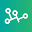

In [35]:
# 링크를 찾으려면...
import re
dom.find(text=re.compile('나무위키')).find_parent().find_parent().find_parent().find_parent()

In [36]:
# 링크의 title을 찾는다
dom.select('h3')
# 동일한 표현들
dom.select('.LC20lb.MBeuO.DKV0Md')
dom.select('.LC20lb')
dom.select('h3.LC20lb')
dom.select('h3.LC20lb.MBeuO.DKV0Md')

[<h3 class="LC20lb MBeuO DKV0Md">카리나(aespa)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">AESPA KARINA 카리나 (@karina_aespas_)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">카리나(aespa) (r3170 판)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">카리나 (가수) - 위키백과, 우리 모두의 백과사전</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">#PictureChallenge with #KARINA #GISELLE #HYO #효연 ...</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">230625 aespa(에스파) 'Next Level' 카리나 KARINA 4K Cam ...</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">#KARINA big girl making money #BetterThingsChallenge ...</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">Chicago #pinkchampagne #aespa #æspa #에스파 ... - YouTube</h3>]

In [37]:
dom.select('a > h3.LC20lb') 
dom.select('a[jsname="UWckNb"] > h3.LC20lb') 

[<h3 class="LC20lb MBeuO DKV0Md">카리나(aespa)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">AESPA KARINA 카리나 (@karina_aespas_)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">카리나(aespa) (r3170 판)</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">카리나 (가수) - 위키백과, 우리 모두의 백과사전</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">#PictureChallenge with #KARINA #GISELLE #HYO #효연 ...</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">230625 aespa(에스파) 'Next Level' 카리나 KARINA 4K Cam ...</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">#KARINA big girl making money #BetterThingsChallenge ...</h3>,
 <h3 class="LC20lb MBeuO DKV0Md">Chicago #pinkchampagne #aespa #æspa #에스파 ... - YouTube</h3>]

[<a data-jsarwt="1" data-usg="AOvVaw0AVyeVNjJkBjN3IUmzE7jM" data-ved="2ahUKEwjasMuXzauBAxUSh_0HHbcUBSQQFnoECCkQAQ" href="https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(aespa)" jsname="UWckNb"><br/><h3 class="LC20lb MBeuO DKV0Md">카리나(aespa)</h3><div class="notranslate TbwUpd NJjxre iUh30 ojE3Fb"><span class="H9lube"><div aria-hidden="true" class="eqA2re NjwKYd Vwoesf"></div></span><div><span class="VuuXrf">나무위키</span><div class="byrV5b"><cite class="qLRx3b tjvcx GvPZzd cHaqb" role="text">https://namu.wiki<span class="dyjrff ob9lvb" role="text"> › 카리나(aespa)</span></cite></div></div></div></a>,
 <a data-jsarwt="1" data-usg="AOvVaw3K1d_QjjGST-a8sc5WRGoH" data-ved="2ahUKEwjasMuXzauBAxUSh_0HHbcUBSQQFnoECCoQAQ" href="https://www.instagram.com/karina_aespas_/" jsname="UWckNb"><br/><h3 class="LC20lb MBeuO DKV0Md">AESPA KARINA 카리나 (@karina_aespas_)</h3><div class="notranslate TbwUpd NJjxre iUh30 ojE3Fb"><span class="H9lube"><div aria-hidden="true" class="eqA2re NjwKYd Vwoesf"></div></span><div
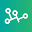
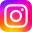
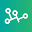
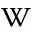
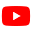
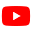
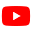
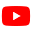

In [38]:
# A(자식으로 H3를 갖고 있는)
dom.select('a[jsname="UWckNb"]:has(> h3)')
dom.select('a:has(> h3.LC20lb)')
dom.select('a:has(> h3.LC20lb.MBeuO.DKV0Md)')

In [39]:
for a in dom.select('a:has(> h3.LC20lb.MBeuO.DKV0Md)'):
    print(a.select_one('h3').text) # 타이틀
    print(a.attrs['href']) # 링크
    

카리나(aespa)
https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(aespa)
AESPA KARINA 카리나 (@karina_aespas_)
https://www.instagram.com/karina_aespas_/
카리나(aespa) (r3170 판)
https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(aespa)?rev=3170
카리나 (가수) - 위키백과, 우리 모두의 백과사전
https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98_(%EA%B0%80%EC%88%98)
#PictureChallenge with #KARINA #GISELLE #HYO #효연 ...
https://www.youtube.com/watch?v=gO_ONOnzH-s
230625 aespa(에스파) 'Next Level' 카리나 KARINA 4K Cam ...
https://www.youtube.com/watch?v=v63rTR68TdA
#KARINA big girl making money #BetterThingsChallenge ...
https://www.youtube.com/watch?v=prSFnMkjtlI
Chicago #pinkchampagne #aespa #æspa #에스파 ... - YouTube
https://www.youtube.com/shorts/Dul1Q0SK0n4


In [40]:
resp = download('https://search.daum.net/search', {'w':'tot', 'q':'카리나'})
dom = BeautifulSoup(resp.text, 'html5lib')

In [41]:
dom.select('a.tit_main.fn_tit_u') # 속성만 이용(class)
dom.select('.wrap_cont > a.tit_main') # 부모 관계와 클래스 이용
dom.select('.wrap_thumb + .wrap_cont > a.tit_main') # .wrap_thumb라는 주변 속성(형제 노드)을 사용한다.
dom.select('.wrap_thumb[id] + .wrap_cont') # .wrap_thumb[id]: id 값이 있으면 사용가능하다 (wrap_thumb가 id 값을 가지고 있음)
dom.select('#container > li > div:last-child > a') # 앵간하면 id는 1개를 갖는다 > 뉴스에 해당되는 li > div > 마지막 자식의 a

[<a class="tit_main fn_tit_u" data-action-type="ks" href="https://v.daum.net/v/20230903232408019?f=o" onclick='smartLog(this, "dc=NNS&amp;p=14&amp;d=26ZrasqVrAaAO3AQsh&amp;pg=1&amp;r=1&amp;rc=4&amp;e1=16O9wCZdr911fR5W97&amp;e3=0&amp;ext=dsid=26ZrasqVrAaAO3AQsh", event, {"cpid": {"value": "16O9wCZdr911fR5W97"}});' target="_blank"> 에스파 <b>카리나</b>, 걸어 다니는 인형… 일상이 화보 </a>,
 <a class="tit_main fn_tit_u" data-action-type="ks" href="https://v.daum.net/v/20230911172827349?f=o" onclick='smartLog(this, "dc=NNS&amp;p=14&amp;d=26qtZ1DFoQ0b83nX1Z&amp;pg=1&amp;r=2&amp;rc=4&amp;e1=16EYSMhnbuylgdbAfU&amp;e3=0&amp;ext=dsid=26qtZ1DFoQ0b83nX1Z", event, {"cpid": {"value": "16EYSMhnbuylgdbAfU"}});' target="_blank"> <b>카리나</b>, 중단발 사진 공개…단발 욕구↑ </a>,
 <a class="tit_main fn_tit_u" data-action-type="ks" href="https://v.daum.net/v/20230911185502680?f=o" onclick='smartLog(this, "dc=NNS&amp;p=14&amp;d=26PvdDJI7rjqtkLVaC&amp;pg=1&amp;r=3&amp;rc=4&amp;e1=160KxXudRMOTDFLTC3&amp;e3=0&amp;ext=dsid=26PvdDJI7rjqtkLVaC"

In [42]:
for a in dom.select('#container > li > div:last-child > a'):
    print(a.text.strip())
    print(a.attrs['href'])

에스파 카리나, 걸어 다니는 인형… 일상이 화보
https://v.daum.net/v/20230903232408019?f=o
카리나, 중단발 사진 공개…단발 욕구↑
https://v.daum.net/v/20230911172827349?f=o
에스파 카리나, 모자 커 보이는 착시 효과… ‘소두 인증’
https://v.daum.net/v/20230911185502680?f=o
진짜 "美쳤다" 소리 나온다…카리나, 얼마나 예쁘길래 '초근접샷이 저 미모'
https://v.daum.net/v/20230822121936051?f=o


In [43]:
for title in dom.select('c-doc-web > c-title'):
    print(title.text)
    print(title['data-href'])

카리나 (배우)
https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98%20%28%EB%B0%B0%EC%9A%B0%29
카리나(가디언 테일즈) - 나무위키
https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(%EA%B0%80%EB%94%94%EC%96%B8%20%ED%85%8C%EC%9D%BC%EC%A6%88)
카리나 달글 10 🩵🫧 We go better things 🪸💙
https://cafe.daum.net/Duckgu/D2nu/41713?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
에스파 카리나의 평소 식사량
https://cafe.daum.net/subdued20club/ReHf/4409073?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
카리나랑 1년 사귀기 vs 현금 1억받기
https://cafe.daum.net/ssaumjil/LnOm/3026626?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
전성기 사나 vs 현 카리나
https://cafe.daum.net/dotax/Elgq/4173172?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
에스파 카리나, 유노윤호 새 앨범 지원 사격 [공식]
https://cafe.daum.net/SoulDresser/FLTB/752076?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
AI로 만든 에스파 카리나 바비.jpg
https://table.cafe.daum.net/p/1217111531/207167064921750272
최근 화제가 되고 있는 에스파 카리나 다이어트와 다이어트 식단
https://nizniz.tistory.com/149
시에나를 제대로 즐기는 방법 - 만지아의 탑, 캄포광장,시에나 대성당, 카타리나 그리고 카리나
https://brunch.co.kr/@gle-bay/204
원샷 카리나 - 카카오스토리
http://story

In [44]:
# 동시에 여러개 찾는 법은 '''를 사용한다.
for a in dom.select('''
#container > li > div:last-child > a,
c-doc-web > c-title
'''):
    print(a.text.strip())
    # 조건문으로 href가 있으면 'href'를 없으면 'data-href'를
    print(a.attrs[('' if a.has_attr('href') else 'data-') + 'href']) 

에스파 카리나, 걸어 다니는 인형… 일상이 화보
https://v.daum.net/v/20230903232408019?f=o
카리나, 중단발 사진 공개…단발 욕구↑
https://v.daum.net/v/20230911172827349?f=o
에스파 카리나, 모자 커 보이는 착시 효과… ‘소두 인증’
https://v.daum.net/v/20230911185502680?f=o
진짜 "美쳤다" 소리 나온다…카리나, 얼마나 예쁘길래 '초근접샷이 저 미모'
https://v.daum.net/v/20230822121936051?f=o
카리나 (배우)
https://ko.wikipedia.org/wiki/%EC%B9%B4%EB%A6%AC%EB%82%98%20%28%EB%B0%B0%EC%9A%B0%29
카리나(가디언 테일즈) - 나무위키
https://namu.wiki/w/%EC%B9%B4%EB%A6%AC%EB%82%98(%EA%B0%80%EB%94%94%EC%96%B8%20%ED%85%8C%EC%9D%BC%EC%A6%88)
카리나 달글 10 🩵🫧 We go better things 🪸💙
https://cafe.daum.net/Duckgu/D2nu/41713?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
에스파 카리나의 평소 식사량
https://cafe.daum.net/subdued20club/ReHf/4409073?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
카리나랑 1년 사귀기 vs 현금 1억받기
https://cafe.daum.net/ssaumjil/LnOm/3026626?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
전성기 사나 vs 현 카리나
https://cafe.daum.net/dotax/Elgq/4173172?q=%EC%B9%B4%EB%A6%AC%EB%82%98&re=1
에스파 카리나, 유노윤호 새 앨범 지원 사격 [공식]
https://cafe.daum.net/SoulDresser/FLTB/752076?q

In [ ]:
URLs = []
# URLs에서 주소를 하나씩 꺼내서 크롤러에 일을 시킨다
# 전략: BFS(Queue)/DFS(Stack)
while URLs: # 종료 조건: 더이상 URL이 없을때까지
    # seed는 URLs 중 하나의 주소
    seed => /(루트)에 가서 robots.txt 확인
    seed => (HTTP) Req/Resp
    Resp.status_code, Resp.Headers 확인
    content-type: text/html
    HTML => DOM으로 온갖 링크 추출
    => 링크를 절대주소의 형태로 변환(link normalization: urljoin)
    => 링크를 방문한 적이 있는가? (URL seen?)
    True  => seed escape
    False => URLs.append(new_link) 

In [29]:
URLs = []
URLs.append('https://www.google.com/search?client=firefox-b-d&q=%EC%B9%B4%EB%A6%AC%EB%82%98')

In [ ]:
import re
from bs4 import BeautifulSoup
from urllib.parse import urljoin
seens = []

# 이대로 사용하기엔 search space가 너무 크다
# Focused Clawling을 사용하여 depth, domain, content 등을 필터한다.
while URLs:
    seed = URLs.pop(0) # 0은 처음 url부터 찾기, -1은 마지막 url부터 찾기
    resp = download(seed) 
    seens.append(seed)
    if resp.status_code !=200:
        continue
    # 헤더 확인
    if re.search('text/html', resp.headers['Content-Type']):
        dom = BeautifulSoup(resp.text, 'html5lib')
        # 모든 태그에 대해서 링크 뽑기
        # *는 정규표현식에서 해당 문자가 0개 이상 일치 ,: or
        for link in dom.select('*[href], *[src], *[action]'):
            if link.has_attr('src'):
                href = link.attrs['src']
            elif link.has_attr('href'):
                href = link.attrs['href']
            elif link.has_attr('action'):
                href = link.attrs['action']

            # 걸러야하는 것
            # href => http(s) 절대주소, path, (..)/path 형태의 상대주소
            # javascript:, # data, matilto, tel, ...
            if not re.match('(?:#)|(?:javasript)|(?:data)|(?:mailto)', href): # re로 or로 묶는법
                # 링크를 절대주소의 형태로 변환
                newurl = urljoin(resp.request.url, href)
                # 링크를 방문한 적이 있는가?
                if newurl not in seens and newurl not in URLs:
                    URLs.append(newurl)
        break

In [75]:
len(URLs), len(seens)

(57, 1)

In [76]:
len(dom.select('*[href], *[src], *[action]'))

102

In [106]:
# 1. depth 제약 조건
# depth 0은 시작 조건

url = 'https://www.google.com/search?client=firefox-b-d&q=%EC%B9%B4%EB%A6%AC%EB%82%98'
URLs = []
URLs.append((url,0))
# (url, depth) [0]: url, [1]: depth
seens = []

# 이대로 사용하기엔 search space가 너무 크다
# Focused Clawling을 사용하여 depth, domain, content 등을 필터한다.
while URLs:
    seed = URLs.pop(0) # 0은 처음 url부터 찾기, -1은 마지막 url부터 찾기
    seens.append(seed[0])
    resp = download(seed[0]) 
    if resp.status_code !=200:
        continue
    # 헤더 확인
    if re.search('text/html', resp.headers['Content-Type']):
        dom = BeautifulSoup(resp.text, 'html5lib')
        # 모든 태그에 대해서 링크 뽑기
        for link in dom.select('*[href], *[src], *[action]'):
            if link.has_attr('src'):
                href = link.attrs['src']
            elif link.has_attr('href'):
                href = link.attrs['href']
            elif link.has_attr('action'):
                href = link.attrs['action']

            # 걸러야하는 것
            # href => http(s) 절대주소, path, (..)/path 형태의 상대주소
            # javascript:, # data, matilto, tel, ...
            if not re.match('(?:#)|(?:javasript)|(?:data)|(?:mailto)', href): # re로 or로 묶는법
                # 링크를 절대주소의 형태로 변환
                newurl = urljoin(resp.request.url, href)
                # 링크를 방문한 적이 있는가?
                # heuristics 조건 1) 최대 depth가 2인거 까지만 링크 수집
                if seed[1] > 3:
                    continue

                if newurl not in [map(lambda r:r[0], seens)] and\
                   newurl not in [map(lambda r:r[0], URLs)]:
                    URLs.append((newurl, seed[1]+1))
        #break

KeyboardInterrupt: 

In [107]:
len(URLs), len(seens) # 59페이지 돌았을 때 7348개의 링크 추출

(165, 3)

In [103]:
# 2. domain 제약 조건
from requests.compat import urlparse, urljoin

url = 'https://www.google.com/search?client=firefox-b-d&q=%EC%B9%B4%EB%A6%AC%EB%82%98'
URLs = []
URLs.append((url,0))

seens = []
# 정규식도 사용가능하다.
domain = ['www.google.com']

# 이대로 사용하기엔 search space가 너무 크다
# Focused Clawling을 사용하여 depth, domain, content 등을 필터한다.
while URLs:
    seed = URLs.pop(0) # 0은 처음 url부터 찾기, -1은 마지막 url부터 찾기
    seens.append(seed[0])
    resp = download(seed[0]) 
    if resp.status_code !=200:
        continue
    # 헤더 확인
    if re.search('text/html', resp.headers['Content-Type']):
        dom = BeautifulSoup(resp.text, 'html5lib')
        # 모든 태그에 대해서 링크 뽑기
        for link in dom.select('*[href], *[src], *[action]'):
            if link.has_attr('src'):
                href = link.attrs['src']
            elif link.has_attr('href'):
                href = link.attrs['href']
            elif link.has_attr('action'):
                href = link.attrs['action']

            # 걸러야하는 것
            # href => http(s) 절대주소, path, (..)/path 형태의 상대주소
            # javascript:, # data, matilto, tel, ...
            if not re.match('(?:#)|(?:javasript)|(?:data)|(?:mailto)', href): # re로 or로 묶는법
                # 링크를 절대주소의 형태로 변환
                newurl = urljoin(resp.request.url, href)
                # 링크를 방문한 적이 있는가?
                # heuristics 조건 1) 최대 depth가 2인거 까지만 링크 수집
                if seed[1] > 3:
                    continue
                
                # heuristics 조건 2) whitelist; opt-in(domain의 값이 포함되어 있으면)
                                # blacklist; opt-out (not in > in)으로 바꾸면
                # domain을 정규식으로 사용한다면 filter를 사용하는 것이 좋다.
                if urlparse(newurl).netloc not in domain:
                    continue

                if newurl not in [map(lambda r:r[0], seens)] and\
                   newurl not in [map(lambda r:r[0], URLs)]:
                    URLs.append((newurl, seed[1]+1))
        #break

KeyboardInterrupt: 

In [104]:
len(URLs), len(seens)

(124, 3)

In [105]:
[i for i in map(lambda x:urlparse(x).netloc, seens)]

['www.google.com', 'www.google.com', 'www.google.com']